## Импорт необходимых библиотек

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Содание данных для дальнейшего разделения

In [ ]:
# Создание папок для сохранения данных, если они еще не существуют
if not os.path.exists('data_one'):
    os.makedirs('data_one')
if not os.path.exists('data_two'):
    os.makedirs('data_two')
if not os.path.exists('data_three'):
    os.makedirs('data_three')
if not os.path.exists('data_four'):
    os.makedirs('data_four')

## Создание датафреймов

In [ ]:
def random_value(a, b, c, name_col_one, name_col_two):

  # создание случайных данных для двух признаков
  val_1 = np.linspace(a, b, c)
  val_2 = val_1 + np.random.random(c)*2

  # создание датафрейма на основании полученных признаков
  df = pd.DataFrame({
    name_col_one: val_1,
    name_col_two: val_2})
  return df

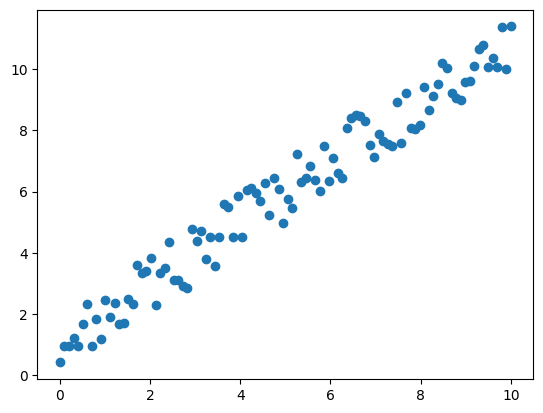

In [ ]:
# создадим датафрейм, где count_application - кол-во обработанных заявок по продажам, money - выручка с продаж
data_one = random_value(0, 10, 100, 'count_application', 'money')
data_one.to_csv('data_one/data_one.csv', index=False)

plt.scatter(data_one['count_application'], data_one['money'])

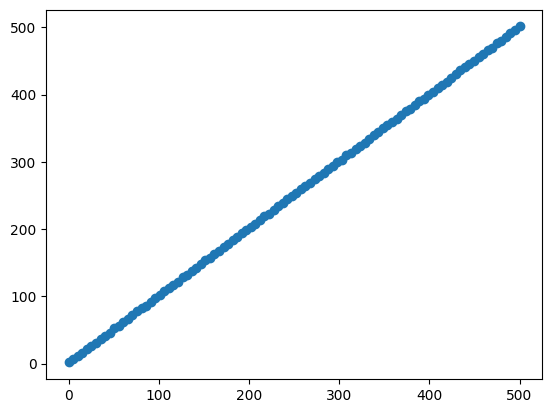

In [ ]:
# создадим датафрейм, где number_steps - кол-во шагов, time - время
data_two = random_value(0, 500, 100, 'number_steps', 'time')
data_two.to_csv('data_two/data_two.csv', index=False)

plt.scatter(data_two['number_steps'], data_two['time'])

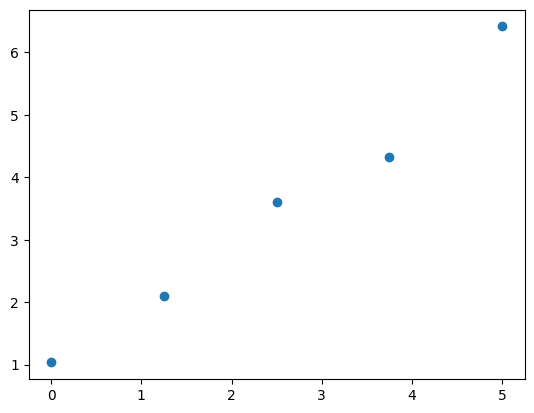

In [ ]:
# создадим датафрейм, где count_task - кол-во выполненных заданий, time - время
data_three = random_value(0, 5, 5, 'count_task', 'time')
data_three.to_csv('data_three/data_three.csv', index=False)

plt.scatter(data_three['count_task'], data_three['time'])

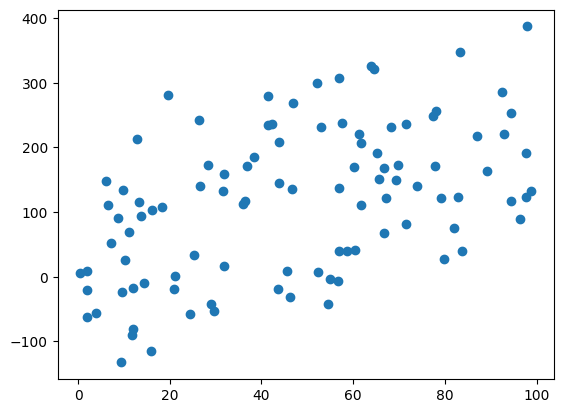

In [ ]:
# Генерация данных возраста и веса
np.random.seed(0)
X = np.random.uniform(0, 100, 100)  # возраст
y = 2 * X + 3 + np.random.normal(0, 100, size=X.shape)  # вес с большим шумом

# Создание DataFrame
data_four = pd.DataFrame({'Age': X, 'weight': y})
data_four.to_csv('data_four/data_four.csv', index=False)

plt.scatter(data_four['Age'], data_four['weight'])

## Обучение модели с помощью Линейной регрессии

In [ ]:
def get_model_learn_data(data_path, column_y):
  """
  На вход функции поступает путь до файла и целевая переменная.
  В результате получаем метрику качества R2 обученной модели на входных данных.
  """

  df = pd.read_csv(data_path, sep=",")

  # отделяем целевую переменную от остальных данных
  X = df.drop(columns=[column_y])
  y = df[column_y]

  # Инициализируем модель
  model = LinearRegression()

  # Обучение модели на обучающей выборке
  m = model.fit(X, y)

  # Предсказание на тестовой выборке
  y_pred = m.predict(X)

  # Метрика качества
  r2 = r2_score(y, y_pred)
  return r2

## Тестирование работы модели на разных датасетах с использованием Pytest

In [ ]:
import ipytest
ipytest.autoconfig()

In [ ]:
def test_data_model_learn():
  assert get_model_learn_data("data_one/data_one.csv", "money") >= 0.90
  assert get_model_learn_data("data_two/data_two.csv", "time") >= 0.90
  assert get_model_learn_data("data_three/data_three.csv", "time") >= 0.90
  assert get_model_learn_data("data_four/data_four.csv", "weight") >= 0.90

In [ ]:
# Запуск тестов
ipytest.run()

F                                                                                            [100%]
============================================= FAILURES =============================================
______________________________________ test_data_model_learn _______________________________________

    def test_data_model_learn():
      assert get_model_learn_data("data_one/data_one.csv", "money") >= 0.90
      assert get_model_learn_data("data_two/data_two.csv", "time") >= 0.90
      assert get_model_learn_data("data_three/data_three.csv", "time") >= 0.90
>     assert get_model_learn_data("data_four/data_four.csv", "weight") >= 0.90
E     AssertionError: assert 0.23908683085021198 >= 0.9
E      +  where 0.23908683085021198 = get_model_learn_data('data_four/data_four.csv', 'weight')

<ipython-input-176-70ce0612fd13>:5: AssertionError
===================================== short test summary info ======================================
FAILED t_646aa87c07eb4b54a29330a851fe9cba.py::test

<ExitCode.TESTS_FAILED: 1>